In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
women_usa = pd.read_csv("C:\\Users\\sachin\\Desktop\\DataQuest\\My Projects\\Datasets\\percent-bachelors-degrees-women-usa.csv")

In [26]:
women_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

## Cleaning the Dataset

Dataset seems to be clean. No Null values in any columns
All are numerical columns
Converting column names to snakecase.

In [27]:
def cleancolumn(str_):
    str_=str_.lower()
    str_=str_.replace(' ','')
    str_=str_.replace('and','_')
    return str_

women_usa.columns = [cleancolumn(column) for column in women_usa.columns]

In [28]:
women_usa.columns

Index(['year', 'agriculture', 'architecture', 'art_performance', 'biology',
       'business', 'communications_journalism', 'computerscience', 'education',
       'engineering', 'english', 'foreignlanguages', 'healthprofessions',
       'math_statistics', 'physicalsciences', 'psychology',
       'publicadministration', 'socialsciences_history'],
      dtype='object')

Some of the columns need to renamed

In [29]:
women_usa = women_usa.rename(
                 {'computerscience':'computer_science',
                  'foreignlanguages':'foreign_languages',
                  'healthprofessions':'health_professions',
                 'physicalsciences':'physical_sciences',
                 'publicadministration':'public_administration',
                 'socialsciences_history':'social_sciences_history'}, axis='columns')

## Exploring the dataset

In [30]:
women_usa.head()

,year,agriculture,architecture,art_performance,biology,business,communications_journalism,computer_science,education,engineering,english,foreign_languages,health_professions,math_statistics,physical_sciences,psychology,public_administration,social_sciences_history
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


-  The first column consists of the year of survey and the rest the field surveyed in.
-  Rows under the field consists of the percentage of women
-  Health professions and and foreign languages fields seems to have the highest percentage of women.

# Analyzing the percentage of Men & Women in all the fields

In [31]:
women_usa['year'].describe()

count      42.000000
mean     1990.500000
std        12.267844
min      1970.000000
25%      1980.250000
50%      1990.500000
75%      2000.750000
max      2011.000000
Name: year, dtype: float64

-  Years covered are from 1970 to 2011
-  Ignoring the decimal values for  sake of simplicity

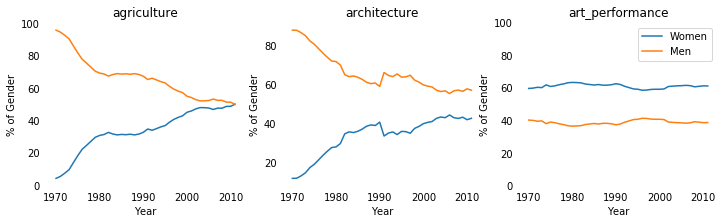

In [42]:
fig=plt.figure(figsize=(12,3))

columns = ['year', 'agriculture', 'architecture', 'art_performance']

list_spine = ['left','right','top','bottom']

for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(women_usa.iloc[:,0],women_usa[columns[i]],label='Women')
    ax.plot(women_usa.iloc[:,0],100-women_usa[columns[i]],label='Men')
    ax.set_title(columns[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('% of Gender')
    for value in list_spine:
        ax.spines[value].set_visible(False)
    ax.tick_params(left=False,right=False,top=False,bottom=False)
    
plt.legend()
plt.ylim(0,100)
plt.show()

-  Agriculture - The gap between the gender has been closed by 2011
-  Architecture - Even though the gap has been reduced, from mid 2000's the ratio is at 60-40 for Men and Women in the field respectively.
-  Art & Performance - The ratio is 40-60 for Men & Women respectively since 1970's and is fairly constant.

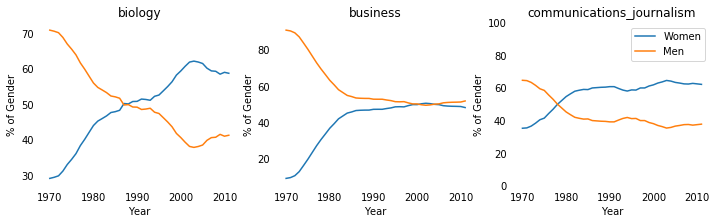

In [43]:
fig=plt.figure(figsize=(12,3))

list_=list(women_usa.columns)

columns = ['year','biology',
       'business', 'communications_journalism']

list_spine = ['left','right','top','bottom']

for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(women_usa.iloc[:,0],women_usa[columns[i]],label='Women')
    ax.plot(women_usa.iloc[:,0],100-women_usa[columns[i]],label='Men')
    ax.set_title(columns[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('% of Gender')
    for value in list_spine:
        ax.spines[value].set_visible(False)
    ax.tick_params(left=False,right=False,top=False,bottom=False)
    
plt.legend()
plt.ylim(0,100)
plt.show()

-  Biology    - Women overtook men the mid 1980's and are still going strong with 60% share.
-  Business   - With significant effore on gender diversity, women have equalled men in Business
-  Journalism - Women have had upper hand in Communication and Journalism since late 1970's and are 60% strong now.

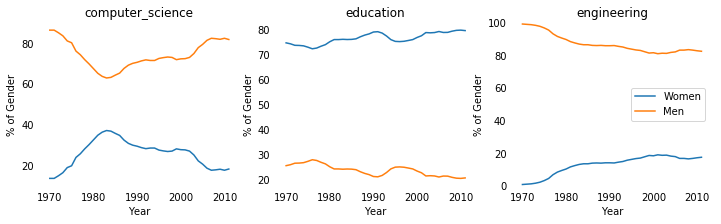

In [44]:
fig=plt.figure(figsize=(12,3))

list_=list(women_usa.columns)

columns = ['year','computer_science',
       'education', 'engineering']

list_spine = ['left','right','top','bottom']

for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(women_usa.iloc[:,0],women_usa[columns[i]],label='Women')
    ax.plot(women_usa.iloc[:,0],100-women_usa[columns[i]],label='Men')
    ax.set_title(columns[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('% of Gender')
    for value in list_spine:
        ax.spines[value].set_visible(False)
    ax.tick_params(left=False,right=False,top=False,bottom=False)
    
plt.legend()
plt.ylim(0,100)
plt.show()

### All above fields are still dominated by Men at 80%

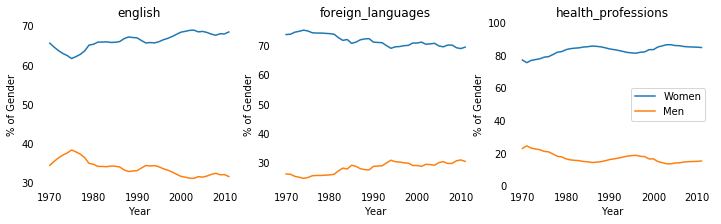

In [45]:
fig=plt.figure(figsize=(12,3))

list_=list(women_usa.columns)

columns = ['year','english', 'foreign_languages',
       'health_professions']

list_spine = ['left','right','top','bottom']

for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(women_usa.iloc[:,0],women_usa[columns[i]],label='Women')
    ax.plot(women_usa.iloc[:,0],100-women_usa[columns[i]],label='Men')
    ax.set_title(columns[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('% of Gender')
    for value in list_spine:
        ax.spines[value].set_visible(False)
    ax.tick_params(left=False,right=False,top=False,bottom=False)
    
plt.legend()
plt.ylim(0,100)
plt.show()

### All the above fields are dominated by Women with English and Foreign Langauages at 70% and Health Professions at 80%

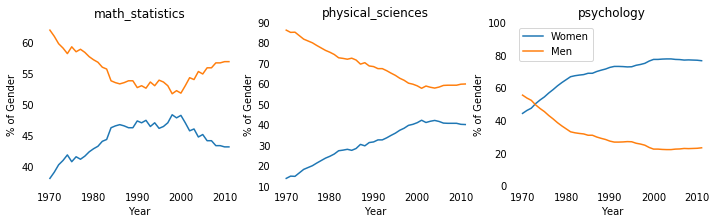

In [46]:

    
fig=plt.figure(figsize=(12,3))

list_=list(women_usa.columns)

columns = ['year','math_statistics', 'physical_sciences',
       'psychology']

list_spine = ['left','right','top','bottom']

for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(women_usa.iloc[:,0],women_usa[columns[i]],label='Women')
    ax.plot(women_usa.iloc[:,0],100-women_usa[columns[i]],label='Men')
    ax.set_title(columns[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('% of Gender')
    for value in list_spine:
        ax.spines[value].set_visible(False)
    ax.tick_params(left=False,right=False,top=False,bottom=False)
    
plt.legend()
plt.ylim(0,100)
plt.show()

-  Math & Stats - The gap significantly reduced in 2000's but by 2010 stands at 55-45
-  Physical Sciences - Since 2000's the gap has been constant at 65-35
-  Psychology - The second field after Biology where Women overtook Men. 

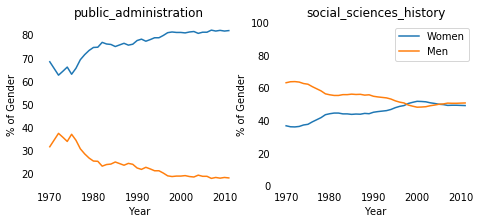

In [48]:
fig=plt.figure(figsize=(12,3))

list_=list(women_usa.columns)

columns = ['year','public_administration', 'social_sciences_history']

list_spine = ['left','right','top','bottom']

for i in range(1,3):
    ax = fig.add_subplot(1,3,i)
    ax.plot(women_usa.iloc[:,0],women_usa[columns[i]],label='Women')
    ax.plot(women_usa.iloc[:,0],100-women_usa[columns[i]],label='Men')
    ax.set_title(columns[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('% of Gender')
    for value in list_spine:
        ax.spines[value].set_visible(False)
    ax.tick_params(left=False,right=False,top=False,bottom=False)
    
plt.legend()
plt.ylim(0,100)
plt.show()

-  Public Administration - This field definitely needs more Men as the gap is at 85% to 15%
-  Social Sciences & History - After a brief upper hand in late 1990's, women have settled for equal share in this field

# Conclusion


## Fields where Men are Majority by large gap

#### Health Professions
#### Computer Science
#### Education
#### Engineering


## Fields where Men are Majority by Small gap
#### Architecture
#### Art & Performance
#### Communications & Journalism
#### Math & Statistics
#### Physical Sciences


## Fields where Women are Majority by large gap

#### Biology
#### Psychology
#### Public Administration
#### English
#### Foreign Languages


## Fields with Gender Equality

#### Agriculture
#### Business
#### Social Sciences and History


